<img src="https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" width=600>

<font color='gree'>I am using a Chess Objects Images dataset from Kaggle. Link:- https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset

## <font color='darkorange'>Build an neural network model for image data</font>

In this project we'll build a neural network model that uses image data. We'll do this to better understand how these kinds of models work, and to expand on the types of data we can use in our data science projects.

In this project you will:

1. Bring in an image dataset of your choosing
2. Define your question of interest
3. Preprocess the data
4. Build and fit two neural network models
6. Discuss and interpret the results

## <font color='darkorange'>Ask a question</font>

<font color='red'>Q1. What question are you going to address? (Marks: 1)
<br>
<font color='gree'>My question of interest is that, can we build a Neural Network Model that can predict Chess Pieces? I want to see if it's possible to create a model which can predict the Chess Pieces accurately since King and Queen look very similar. Also I am using a very small dataset and I will be testing different models and compare them to see the effect of depth & complexity of the model. The third question is that, will the pretrained model boost the model's predictive ability?

<font color='red'>Q2. Define the problem as a supervised learning task, and how you will solve it using machine learning. (Marks: 1)
<br>
<font color='gree'>I am predicting the Chess Pieces from the Image Dataset. So I am using Supervised Learning and Multi Class Classification. First I will be making a Dense Model and then a Convolutaional Neural Network Model. After that I will try Pretained Model and will be using the best Model for Testing the predictability.

## <font color='darkorange'>Data Story</font>


Load your data:

(*option 1*) you can use an image dataset within keras, other than mnist: 

Choosing this option will make the data preprocessing a little easier

> For example, you can load the cifar dataset: 

>> (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

>> https://www.cs.toronto.edu/~kriz/cifar.html
  


(*option 2*) you can find your own image dataset:

> Choosing this option you will recive 2 bonus marks. 

> I.e., it will be possible to get more than 100% on this project, and this extra will count towards your final grade.

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading the required packages.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import image_dataset_from_directory

import pathlib, os
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import splitfolders

In [ ]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data.
local_zip = '/content/drive/MyDrive/Chess.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Set the path to the images
new_base_dir = pathlib.Path("/content/Chess")

(Action) Do some exploritory data analysis related to your quesiton. (Marks: 1)

In [ ]:
# Getting the information of the Directory.
image_size = (180, 180)
batch = 40

print("In the Chess Folder: ")
dataset = image_dataset_from_directory(
    new_base_dir,
    image_size = image_size,
) 


In the Chess Folder: 
Found 552 files belonging to 6 classes.


In [ ]:
# Getting the information on the folder.

def getAllFiles(path):
    print("The Folder", os.path.basename('/content/Chess'), ' has', len(os.listdir(path)), 'folders.\n')

    for root, dirs, files in os.walk(path):
        for name in dirs:
            print("The Foler", os.path.join(name), "has", len(os.listdir(os.path.join(root,name))), 'images.')
            # print(len(os.listdir(os.path.join(root,name))))

temp_test = getAllFiles(r"/content/Chess")

The Folder Chess  has 7 folders.

The Foler Bishop has 87 images.
The Foler Pawn has 107 images.
The Foler Queen has 78 images.
The Foler Rook has 102 images.
The Foler Knight has 106 images.
The Foler King has 76 images.


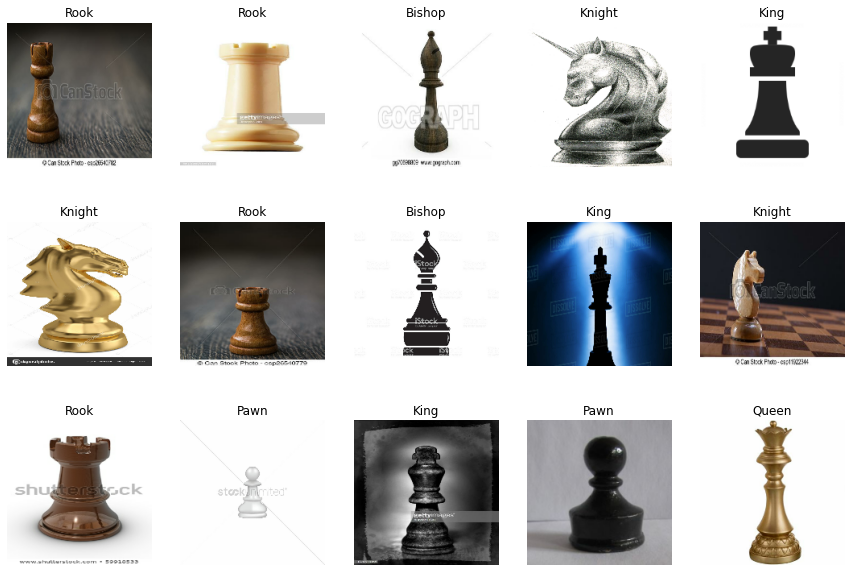

In [ ]:
# Getting some images from the Base Directory!
plt.figure(figsize=(15, 25))
class_names = dataset.class_names

for images, labels in dataset.take(1):
    for i in range(15):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<font color='gree'>Here are some random Images from the Chess Image Dataset.

<font color="red">Nicely visual!</font>

## <font color='darkorange'>Data wrangling / preprocessing</font>

<font color='skyblue'>Get your data ready to be inputed into your NN model. Don't forget to split your data so that you'll have a testing dataset at the end. (Marks: 2)

In [ ]:
# Make a Temporary Folder for Splitting Dataset.
os.mkdir('/content/temp')

# Splitting with a ratio.

# Splitting 70% for Training, 20% for Validation and 10% Testing.
splitfolders.ratio(new_base_dir, output = "/content/temp", 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values

Copying files: 556 files [00:00, 3639.86 files/s]


In [ ]:
def getAllFiles(path):
    print("The Directory", path, ' has', len(os.listdir(path)), 'folders.\n')
    # print(len(os.listdir(path)))

    for root, dirs, files in os.walk(path):
        for name in dirs:
            print("The Directory", os.path.join(name), "has", len(os.listdir(os.path.join(root,name))), 'images.')
            # print(len(os.listdir(os.path.join(root,name))))

print("In the Train Folder: ")
temp_train = getAllFiles(r"/content/temp/train")

print("\nIn the Validation Folder: ")
temp_valid = getAllFiles(r"/content/temp/val")

print("\nIn the TestFolder: ")
temp_test = getAllFiles(r"/content/temp/test")


In the Train Folder: 
The Directory /content/temp/train  has 6 folders.

The Directory Bishop has 60 images.
The Directory Pawn has 74 images.
The Directory Queen has 54 images.
The Directory Rook has 71 images.
The Directory Knight has 74 images.
The Directory King has 53 images.

In the Validation Folder: 
The Directory /content/temp/val  has 6 folders.

The Directory Bishop has 17 images.
The Directory Pawn has 21 images.
The Directory Queen has 15 images.
The Directory Rook has 20 images.
The Directory Knight has 21 images.
The Directory King has 15 images.

In the TestFolder: 
The Directory /content/temp/test  has 6 folders.

The Directory Bishop has 10 images.
The Directory Pawn has 12 images.
The Directory Queen has 9 images.
The Directory Rook has 11 images.
The Directory Knight has 11 images.
The Directory King has 8 images.


## <font color='darkorange'>Image Preprocessing</font>

In [ ]:
# Preprocessing

# Training data
print("From the Chess Directory: \n")
train_dataset = image_dataset_from_directory(
    new_base_dir,
    validation_split=0.2,
    seed = 1,
    subset="training",
    image_size = image_size,
    batch_size = batch,
    label_mode="categorical",

)

# Validation data
print("\n")
validation_dataset = image_dataset_from_directory(
    new_base_dir,
    validation_split=0.2,
    seed = 1,
    subset = "validation",
    image_size = image_size,
    batch_size = batch,
    label_mode="categorical",
)

From the Chess Directory: 

Found 552 files belonging to 6 classes.
Using 442 files for training.


Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("Data Batch Shape:", data_batch.shape)
  print("Labels Batch Shape:", labels_batch.shape)
  break

Data Batch Shape: (40, 180, 180, 3)
Labels Batch Shape: (40, 6)


## <font color='darkorange'>Model building</font>

Build a neural network model using what you've learnt about processing images in these kinds of models (use the functional approach to model building).

> Build one model based on dense layers (Marks: 2)

> Build a second model using convolutional and dense layers (Marks: 2)

Note: use one method of reducing overfitting (e.g., L1, L2, Dropout, data augmentation). (Marks: 1)





### <font color='skyblue'>Building Dense Neural Network</font>

In [ ]:
# Building The Dense Neural Network
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1.0/255)(inputs)
x = layers.Flatten()(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(6, activation="softmax")(x)

# Building the model.
model = keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model.
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"] )

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath = "Dense_NN.keras",
    save_best_only=True,
    monitor="val_loss"),
    
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience = 5)
]

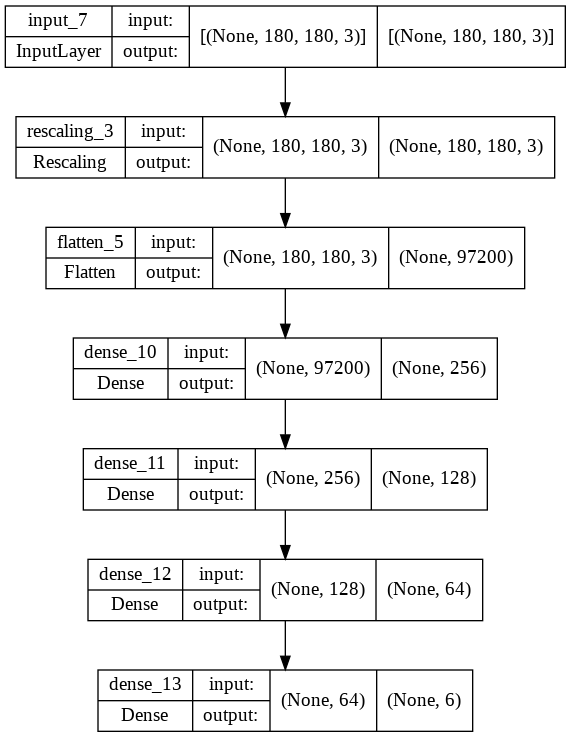

In [ ]:
# Plotting the Model
plot_model(model, show_shapes=True)

In [ ]:
# Printing Summary
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 flatten_5 (Flatten)         (None, 97200)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               24883456  
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 6)                 390 

<font color="red">Given the model has 24 million parameters and we are using hundres of images for training it is likely that the model will quickly overfit. I.e., it is a big model!! :-)</font>

In [ ]:
# Fitting the model.
history = model.fit (train_dataset,
                    epochs=30,
                    batch_size=64,
                    callbacks= callbacks,
                    validation_data = validation_dataset)

Epoch 1/30
12/12 [==============================] - 10s 610ms/step - loss: 99.6934 - accuracy: 0.1742 - val_loss: 83.7833 - val_accuracy: 0.1000
Epoch 2/30
12/12 [==============================] - 11s 654ms/step - loss: 35.9451 - accuracy: 0.1606 - val_loss: 31.4261 - val_accuracy: 0.2364
Epoch 3/30
12/12 [==============================] - 7s 447ms/step - loss: 28.1767 - accuracy: 0.1810 - val_loss: 9.8385 - val_accuracy: 0.1727
Epoch 4/30
12/12 [==============================] - 7s 403ms/step - loss: 17.1394 - accuracy: 0.1652 - val_loss: 43.1984 - val_accuracy: 0.1000
Epoch 5/30
12/12 [==============================] - 7s 407ms/step - loss: 22.2351 - accuracy: 0.1946 - val_loss: 39.8800 - val_accuracy: 0.1909
Epoch 6/30
12/12 [==============================] - 7s 403ms/step - loss: 17.0588 - accuracy: 0.1946 - val_loss: 16.0922 - val_accuracy: 0.1000
Epoch 7/30
12/12 [==============================] - 7s 450ms/step - loss: 16.1202 - accuracy: 0.1742 - val_loss: 30.5616 - val_accuracy

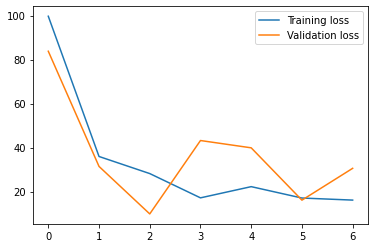

In [ ]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()


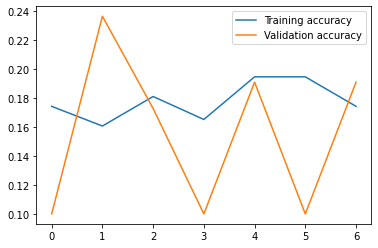

In [ ]:
# Making the training and validation accuracy plot.
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()

In [ ]:
dense_acc = print("The accuracy of Dense Model is:-", round( max(history.history["val_accuracy"]), 2 ))

The accuracy of Dense Model is:- 0.24


<font color="red">Nicely done!</font>

### <font color='skyblue'>Building Convolutional Neural Network</font>

In [ ]:

data_augmentation = keras.Sequential(
            [
               layers.RandomFlip("horizontal"),
               layers.RandomRotation(0.1),
               layers.RandomZoom(0.1),
               layers.RandomContrast(0.2),  
               layers.RandomTranslation(0.1,0.1)
] )

In [ ]:
# Define the model layers!
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1.0/255)(inputs)

# Start of our new block
residuals = x 
x = layers.Conv2D(filters=32, kernel_size=3, padding="same", use_bias=False)(x) #remove relu activation
x = layers.BatchNormalization()(x) #add batch normalization
x = layers.Activation("relu")(x) #add relu activation only after batch normalization
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residuals = layers.Conv2D(32,1,2)(residuals)
x = layers.add([x,residuals])
# End of our new block

# Block #2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

# Block #3
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

# Block #4
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

# Block #5
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(6, activation = "softmax")(x)

# Building the model
model = keras.Model(inputs=inputs, outputs=outputs)

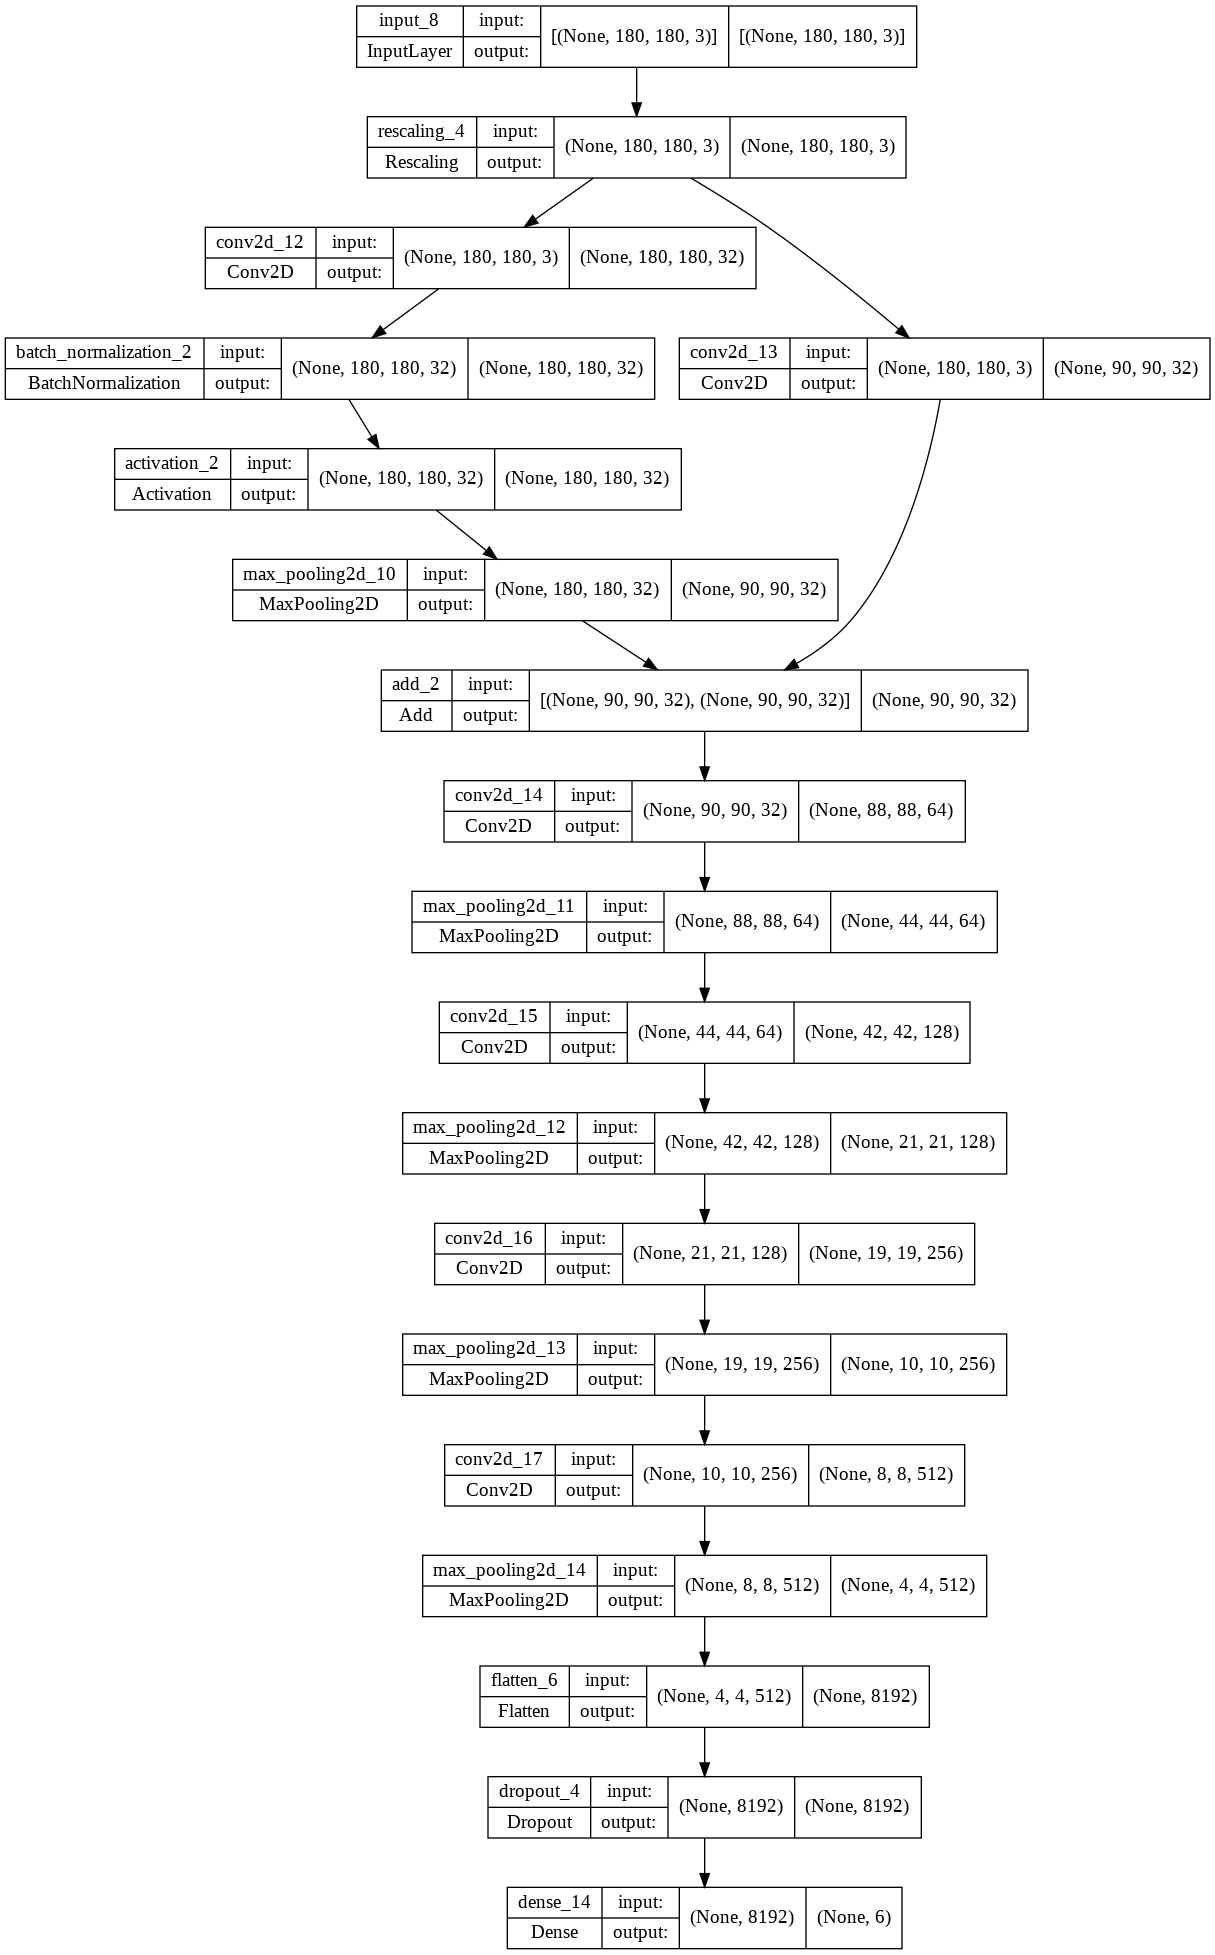

In [ ]:
# Plotting the Model
plot_model(model, show_shapes=True)

In [ ]:
# Printing Summary
print(model.summary())

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_4 (Rescaling)        (None, 180, 180, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 180, 180, 32  864         ['rescaling_4[0][0]']            
                                )                                                                 
                                                                                            

<font color="red">Nicely model building! Good use of batchnormalization and residual connections in that first block! And only 1 million parameters :-)</font>

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"] )

# Set the early stopping and model saving.
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="convnet_chess_classification.keras",
    save_best_only=True,
    monitor="val_loss"),
    
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5)
]

# Fitting the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
12/12 [==============================] - 51s 4s/step - loss: 3.7357 - accuracy: 0.1968 - val_loss: 1.7769 - val_accuracy: 0.1727
Epoch 2/50
12/12 [==============================] - 46s 4s/step - loss: 1.7666 - accuracy: 0.2149 - val_loss: 1.7794 - val_accuracy: 0.2364
Epoch 3/50
12/12 [==============================] - 46s 4s/step - loss: 1.7002 - accuracy: 0.2986 - val_loss: 2.2088 - val_accuracy: 0.1818
Epoch 4/50
12/12 [==============================] - 47s 4s/step - loss: 1.7793 - accuracy: 0.3054 - val_loss: 1.7739 - val_accuracy: 0.2273
Epoch 5/50
12/12 [==============================] - 48s 4s/step - loss: 1.6118 - accuracy: 0.3982 - val_loss: 1.7641 - val_accuracy: 0.2818
Epoch 6/50
12/12 [==============================] - 48s 4s/step - loss: 1.5969 - accuracy: 0.4344 - val_loss: 1.7527 - val_accuracy: 0.2364
Epoch 7/50
12/12 [==============================] - 46s 4s/step - loss: 1.3583 - accuracy: 0.4796 - val_loss: 1.7450 - val_accuracy: 0.2182
Epoch 8/50
12/12 [==

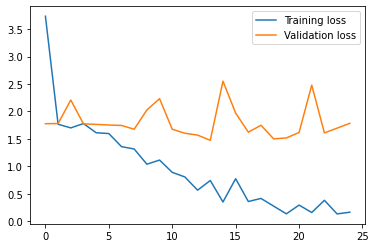

In [ ]:
# Making the training and validation accuracy plot.
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()


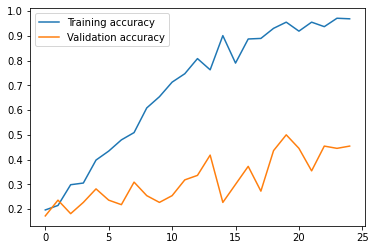

In [ ]:
# Making the training and validation accuracy plot
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()

In [ ]:
cnn_acc = print("The accuracy of Conventional NN Model is:-", round( max(history.history["val_accuracy"]), 3 ))

The accuracy of Conventional NN Model is:- 0.5


<font color="red">Nice, doubled your validation prediction accuracy!</font>

##### <font color='skyblue'> Justify your choice of model architecture for the convolutional neural network (Marks:4)
</font>
<br>
<font color='red'> Q3: Why did you choose the types of layers you did?
</font>
<br>
<font color='gree'>As I am using a small dataset, in order to avoid overfitting problem, I need to expand artificially my dataset. Using Data Augumentaion I can make my existing dataset even larger. I did some popular augmentations that people use like horizontal flips, random zoom, translations, random contrasst and rotations. The idea is to alter the training data with small transformations to reproduce the variations. I used the conv2d layers because they apply filters add depth to the data where the model can learn and slightly narrows the feature space. I've added batch normalization just after my first conv2D layer and they are very helpful in large networks. I am doing multi class classification so, I used maxpooling2d layers to further reduce the feature space, hopefully making it easier for the model to reduce the data into one of our 6 outputs. I had layers that flattens everything in the end where I ran everything through the final dropout layer with the weight of 0.2. The layers that I used were very useful for my image dataset. 
</font> <br>
<br>
<font color='red'> Q4: Why did you choose the size of layers you did?
</font>
<br>
<font color='gree'>
I started with the Augumentaion Layers and then I gradually increased the filters so started from a smaller then going bigger as we go up in the different blocks. So making the model learn fewer filters and increasing in number as we go deep into the model helps expand the patterns the model identifies, starting with small edges and curve and ending with defined shapes. Larger sized layers allow the model to be more flexible thats why I wanted to go liitle larger but my GPU did not corporate with me. So the largest I could go was around 600.
</font> <br>
<br>
<font color='red'>
Q5: Why did you organize the layers the way you did?
</font>
<br>
<font color='gree'>
To be honest, I tried running the model with different layers with different methods each time. First I tried with just dropout and augementaion the accuracy just boost up 7-8%. Then I added resuduals and flatten on top of that which increased the accuracy till 40-45%. Then I increased the layers and went a liitle bigger. The max I got was 56% which was quite amazing because the dataset is very small. I could not go more deeper thats why I organize the layers like this.
</font> <br>
<br>
<font color='red'>
Q6: Why did you choose the output layer size and activation function that you did?
</font>
<br>
<font color='gree'>
I am doing a multi class Classification and I am predicting 6 different Chess Objects from the Image Dataset thats why my output layer size is 6. For the activation function I used "Softmax" because Softmax assigns decimal probabilities to each class in a multi-class problem where the additional constraint helps training converge more quickly.   

<font color="red">Very good answers! Nice description of how you went about organizing your layers.</font>

### <font color='skyblue'>Building Pre-Trained Model </font>

<font color='red'>Optional: use a pre-trained model to help your performance (1 Bonus Mark)

In [ ]:
# Loading a pretreined model.
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

# Set all the weights to non-trainable.
conv_base.trainable = False

In [ ]:
print(conv_base.summary() )

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
for layer in conv_base.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f26209d8a10> False
<keras.layers.convolutional.Conv2D object at 0x7f26208fc590> False
<keras.layers.convolutional.Conv2D object at 0x7f2620985b90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f26257b5510> False
<keras.layers.convolutional.Conv2D object at 0x7f2620959990> False
<keras.layers.convolutional.Conv2D object at 0x7f2620952c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2620972690> False
<keras.layers.convolutional.Conv2D object at 0x7f262355c350> False
<keras.layers.convolutional.Conv2D object at 0x7f26209d8110> False
<keras.layers.convolutional.Conv2D object at 0x7f2620923c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f262091ba50> False
<keras.layers.convolutional.Conv2D object at 0x7f262092d850> False
<keras.layers.convolutional.Conv2D object at 0x7f26233cdb10> False
<keras.layers.convolutional.Conv2D object at 0x7f262091b990> False
<keras.layers.pooling.MaxPooling2D object at 0x7f26208bc510>

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x) #this prepairs the data for vgg16
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation = "softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_vgg16.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5)
]

history = model.fit(
            train_dataset,
            epochs=50,
            validation_data=validation_dataset,
            callbacks=callbacks)

Epoch 1/50
12/12 [==============================] - 188s 16s/step - loss: 128.2170 - accuracy: 0.3416 - val_loss: 44.9508 - val_accuracy: 0.7000
Epoch 2/50
12/12 [==============================] - 186s 15s/step - loss: 23.2441 - accuracy: 0.6719 - val_loss: 41.8975 - val_accuracy: 0.5818
Epoch 3/50
12/12 [==============================] - 184s 15s/step - loss: 22.5722 - accuracy: 0.7127 - val_loss: 43.2656 - val_accuracy: 0.6182
Epoch 4/50
12/12 [==============================] - 189s 16s/step - loss: 14.7312 - accuracy: 0.7873 - val_loss: 20.5642 - val_accuracy: 0.7636
Epoch 5/50
12/12 [==============================] - 186s 16s/step - loss: 19.8515 - accuracy: 0.7489 - val_loss: 26.1191 - val_accuracy: 0.7364
Epoch 6/50
12/12 [==============================] - 184s 15s/step - loss: 15.4642 - accuracy: 0.7873 - val_loss: 45.2583 - val_accuracy: 0.7091
Epoch 7/50
12/12 [==============================] - 186s 15s/step - loss: 14.8594 - accuracy: 0.8032 - val_loss: 25.2913 - val_accuracy

In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_3 (Flatten)         (None, 12800)             0   

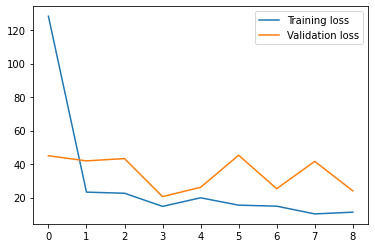

In [ ]:
# make the training and validation loss plot
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()

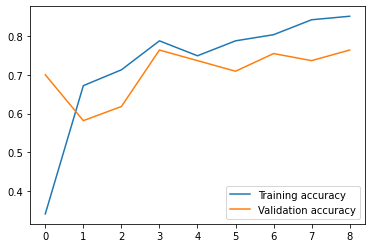

In [ ]:
#make the training and validation accuracy plot
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()

In [ ]:
pre_trained_acc = print("The accuracy of Pre Trained Model is:-", round(max(history.history["val_accuracy"]),3))

The accuracy of Pre Trained Model is:- 0.764


<font color='gree'>The model boosted the peformance by 25%.

<font color="red">Well done!</font>

## <font color='darkorange'>Model testing</font>

<font color='skyblue'>Use your withheld data to see how well your models performed outside the data they were trained on! (Marks: 1)

In [ ]:
# Getting the path of the test dataset.
dir_for_prediction = pathlib.Path("/content/temp")

# Test data
test_dataset = image_dataset_from_directory(
           dir_for_prediction / "test",
           image_size=(180, 180),
           batch_size = 1)

Found 61 files belonging to 6 classes.


In [ ]:
model = keras.models.load_model("feature_extraction_with_vgg16.keras")

model.evaluate(test_dataset)

12/12 [==============================] - 156s 13s/step - loss: 6.4737 - accuracy: 0.8982


[6.4737067222595215, 0.8981900215148926]

<font color='gree'>The accuracy we got in the testing dataset is 89% which is impressive. If we look at the training dataset only 442 images were taken for the training the model. Still it got 89% it might be because the test dataset was small. I was not expecting to be this high.

<font color="red">Me neither, nicely done!!</font>

<font color='gree'>Let's try making some prediction by giving the images from the test dataset. We can see how good the model is at recogniging Chess Objects.

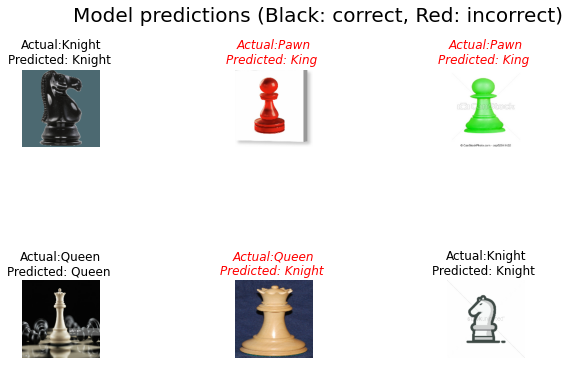

In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (180, 180)) /255.0
    return image, label

test_batches = test_dataset.map(format_image).prefetch(1)

im_image_batch, im_label_batch = next(iter(test_batches))
im_images = im_image_batch.numpy()
im_labels = im_label_batch.numpy()

im_named_labels = [class_names[im_labels[i]] for i, lbl in enumerate(range(32))]

im_named_pred = pred_ks = np.argmax(model.predict(test_batches), axis=-1)

# Plotting Predictions
# Plot the first X (num_rows * num_cols) test images
# (true and predicted labels)

num_rows = 2
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(3 * num_cols, 3 * num_rows))
plt.suptitle("Model predictions (Black: correct, Red: incorrect)", fontsize = 20)
for i in range(num_images):
  ax = plt.subplot(num_rows, 2 *num_cols, 2*i+1)
  plt.imshow(im_images[i])
  title = 'Actual:' + class_names[im_labels[i]] + '\nPredicted: ' + class_names[im_named_pred[i]] + ' '
  plt.title(title)
  if class_names[int(im_labels[i])] != class_names[im_named_pred[i]]:
    ax.set_title(title, style='italic', color='red')
  plt.axis('off')
plt.tight_layout()

<font color='gree'>I ran multiple times and the model is good at predicting Kight, Rook and Queen only. It always makes mistake with Pawn and Bishop, the prediction is always king. This is impressive because I wasn't expecting the prediction ability to be this good with a small dataset. The preditibility is always 50% where it gets half of them right and half wrong. I think the predictibility would be more better if it was a larger dataset. 

<font color="red">This is a great way to interpret your models performance beyond just the accuracy measure. Well done! </font>

## <font color='darkorange'>Explainability</font>

### <font color='skyblue'>Filters</font>

<font color='gree'>Let's look at how we can explain how the CNN is making predictions.

<font color='gree'>First let's load in a model we'd like to explain.

In [ ]:
model_viz = keras.models.load_model('/content/convnet_chess_classification.keras')

In [ ]:
model_viz.layers

<font color='gree'>Let's choose one layer to look at more closely.

In [ ]:
#extract the weights
filters, biases = model_viz.layers[10].get_weights()

#take a look at the shape
filters.shape

#extrac the weights and baises (if we have biases turned off in the conv2d layer)
#filters = model_viz.layers[1].get_weights()

(3, 3, 64, 128)

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

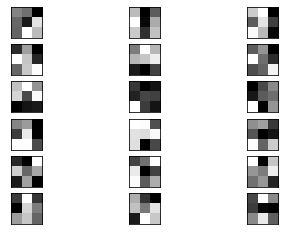

In [ ]:
from matplotlib import pyplot

#how many filters to plot
n_filters = 6

#keep track of which filter we are plotting we 
ix = 1

#run a for loop over each filter
for i in range(n_filters):
	
  # get a filter
	f = filters[:, :, :, i]
	
  # plot each channel separately (three channels)
	for j in range(3):
   
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
  
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1

# show the figure
pyplot.show()

### <font color='skyblue'>Feature maps</font>


<font color='gree'>Let's now look at feature maps (i.e., what comes out of the conv2d layers...)

<font color='gree'>Let's first get an image to pass to the model

In [ ]:
img_path = keras.utils.get_file(
    fname="knight.jpeg",
    origin="https://upload.wikimedia.org/wikipedia/commons/3/31/Chess_piece_-_White_knight.JPG")

2039808/2031272 [==============================] - 0s 0us/step


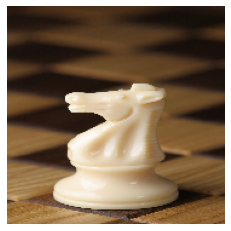

In [ ]:
#make the image fit into the model
def get_img_array(img_path, target_size): 
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img) 
  array = np.expand_dims(array, axis=0) 
  return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

import matplotlib.pyplot as plt 

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8")) 
plt.show()

In [ ]:
depth = 3

activation_model = keras.Model(inputs=model_viz.inputs, outputs=model_viz.layers[depth].output)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

print(first_layer_activation.shape)

(180, 180, 32)


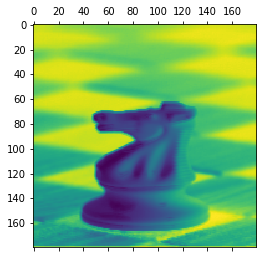

In [ ]:
import matplotlib.pyplot as plt 
plt.matshow(first_layer_activation[:, :, 7], cmap="viridis")

<font color='gree'>Here, if we look at the Knight edges we can see that these neural networks are just transforming the inputs, using a series of layers, into increasingly higher representations of the data. 

### <font color='skyblue'>Shap</font>

<font color='gree'>We have to extract the images out of the dataset we built before. To do so we will apply a function to extract the images and the labels. 

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
unbatch = validation_dataset.unbatch()
images = np.asarray(list(unbatch.map(lambda x, y: x)))

labels = np.asarray(list(unbatch.map(lambda x, y: y)))

In [ ]:
selection = images[6:10]
# Build explainer to help explain predictions of the model
explainer = shap.GradientExplainer(model_viz, selection)

# compute shap values
shap_values = explainer.shap_values(selection)


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
%%capture
import io
from PIL import Image, ImageOps

shap.image_plot(shap_values, selection / 255, show= False)
buffer = io.BytesIO()
plt.savefig(buffer, format='png', dpi=300)
image = Image.open(buffer)

x = image.width

area = (x/10, 450, x/10, 500)
crop = ImageOps.crop(image, area)

crop.save("shap.png")

In [ ]:
# Display the Image!
image = Image.open('shap.png')
display(image)

Output hidden; open in https://colab.research.google.com to view.

<font color='gree'>In the above picture, if we see the 4th picture of Pawn we can see the red pixels which means the high shap values and they are contributing to a higher prediction for that particular Object.  And in the 1st picture of Bishop,we can see the blue pixels, those are pixels that contrbute towards not classifying the image in that particular chess object.

## <font color='darkorange'>Discussion</font>

<font color='skyblue'>Compare the results of the dense and convolutional approach to model building. 

> <font color='red'>Q7. Does one model outperform the other? (Marks: 1)
<br>
<font color='gree'>The accuracy of all the models are: <br>
         The accuracy of Dense Model is:- 0.24.<br>
         The accuracy of Conventional NN Model is:- 0.5. <br>   The accuracy of Pre Trained Model is:- 0.764. <br>

<font color='gree'>The Dense model did not perform that well just making Dense layers with the number of output neurons equal to the number of classes might not be enough for identifying image data. I did not increase the number of more neurons in each layer because I don t wanted to locked out of the GPU. In my first attempt ran with a few layers of 256 neurons, the accuracy was around 24%. 

<font color='gree'>The convolutional layer with data augmentation, flatten and drop out preformed much better where the accuracy jump 25%. Getting 50% is not that good but looking at my dataset and getting 50% was quite unexpected. I wanted to go more more larger layers but got could not do due to GPU lockout. The Pre-Trained model got the highest accuray out of all where it jumped another 25% from the accuracy we got in CNN Model. 

<font color="red">Very nicely done througout!  19/16 </font>